In [2]:
# Using Prophet to forecast the future pollution levels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_excel('dataset.xlsx')
dataset.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,19-02-2022 00:00,20-02-2022 00:00,94.22,206.05,38.05,52.75,59.14,34.77,11.08,1.19,42.83
1,20-02-2022 00:00,21-02-2022 00:00,77.20,175.59,8.25,44.14,30.37,28.73,9.78,1.38,60.86
2,21-02-2022 00:00,22-02-2022 00:00,85.19,219.39,65.20,52.64,81.44,25.33,9.87,2.39,40.01
3,22-02-2022 00:00,23-02-2022 00:00,107.57,269.16,36.97,35.09,49.83,37.96,14.06,1.33,79.56
4,23-02-2022 00:00,24-02-2022 00:00,113.24,208.93,15.29,26.74,26.95,31.46,8.42,1.87,67.35


In [3]:
dataset['From Date'] = pd.to_datetime(dataset['From Date'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_15056\4267604184.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['From Date'] = pd.to_datetime(dataset['From Date'])


In [4]:
dataset.ffill(axis = 0, inplace = True)
df = dataset[['From Date', 'PM2.5']]
df.head()

,From Date,PM2.5
0,2022-02-19,94.22
1,2022-02-20,77.20
2,2022-02-21,85.19
3,2022-02-22,107.57
4,2022-02-23,113.24


In [5]:
df = df.rename(columns={'From Date': 'ds', 'PM2.5': 'y'})

In [7]:
df.head()

,ds,y
0,2022-02-19,94.22
1,2022-02-20,77.20
2,2022-02-21,85.19
3,2022-02-22,107.57
4,2022-02-23,113.24


In [8]:
import pandas as pd
from dateutil import parser
from prophet import Prophet

model = Prophet()
model.fit(df)

17:25:47 - cmdstanpy - INFO - Chain [1] start processing
17:25:47 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-02-19,120.087012,59.561516,178.707336
1,2022-02-20,120.507518,63.346736,179.606011
2,2022-02-21,116.838424,58.687160,171.452310
3,2022-02-22,115.433334,55.669669,176.874287
4,2022-02-23,111.795042,55.801529,175.118528


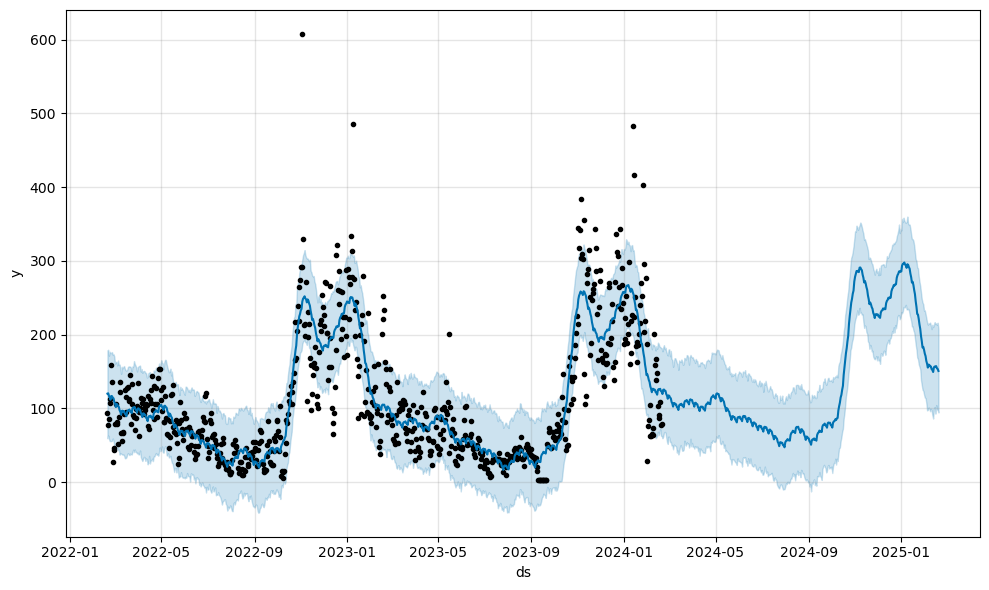

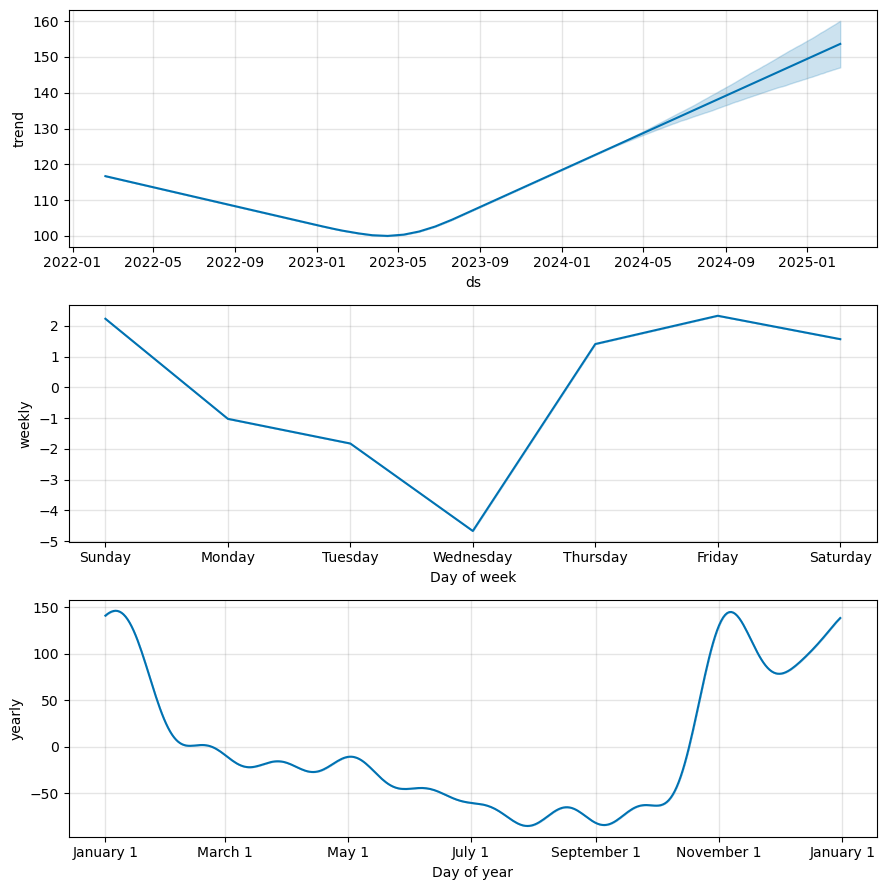

In [16]:

fig1 = model.plot(forecast)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()